In [5]:
import pandas as pd
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

In [6]:
from sklearn.model_selection import train_test_split

X,y=df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)


#standardize the features

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_std=sc.fit_transform(X_train)
X_test_std=sc.transform(X_test)

In [7]:
import numpy as np
cov_mat=np.cov(X_train_std.T)
eigen_vals, eigen_vecs=np.linalg.eig(cov_mat)
print('\nEigenvalues \n%s' % eigen_vals)


Eigenvalues 
[4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]


**variance explained ratios**

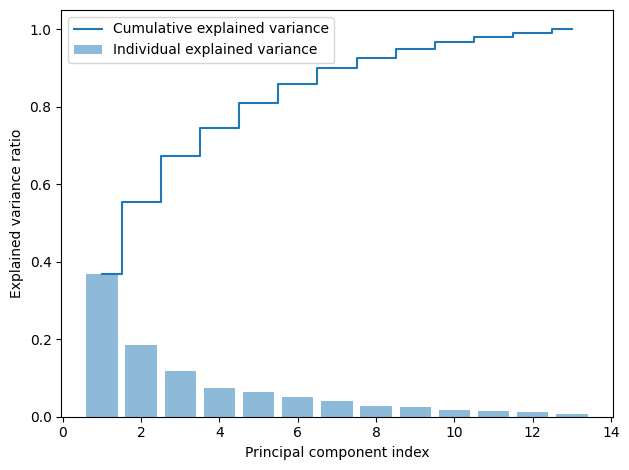

In [8]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
import matplotlib.pyplot as plt
plt.bar(range(1,14), var_exp, alpha=0.5, align='center',
label='Individual explained variance')
plt.step(range(1,14), cum_var_exp, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [9]:
#make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
#sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [10]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))

In [11]:
print('Matrix W:\n', w)

Matrix W:
 [[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


By executing the preceding code, we have created a 13 × 2-dimensional projection
matrix, W, from the top two eigenvectors.


In [12]:
X_train_std[0].dot(w)

array([2.38299011, 0.45458499])

In [13]:
 X_train_pca = X_train_std.dot(w)

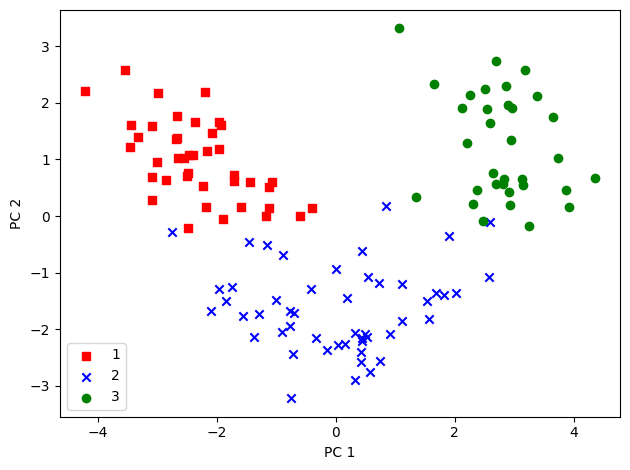

In [14]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
  plt.scatter(X_train_pca[y_train==l, 0], X_train_pca[y_train==l, 1], c=c, label=l, marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

**Principal component analysis in scikit-learn**

In [15]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):

 # setup marker generator and color map
 markers = ('s', 'x', 'o', '^', 'v')
 colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
 cmap = ListedColormap(colors[:len(np.unique(y))])

 # plot the decision surface
 x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
 x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
 xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
 np.arange(x2_min, x2_max, resolution))
 Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
 Z = Z.reshape(xx1.shape)
 plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
 plt.xlim(xx1.min(), xx1.max())
 plt.ylim(xx2.min(), xx2.max())

 # plot examples by class
 for idx, cl in enumerate(np.unique(y)):
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.6, color=cmap(idx), edgecolor='black', marker=markers[idx], label=cl)

<ipython-input-15-7d30eaa77160>:22: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.6, color=cmap(idx), edgecolor='black', marker=markers[idx], label=cl)


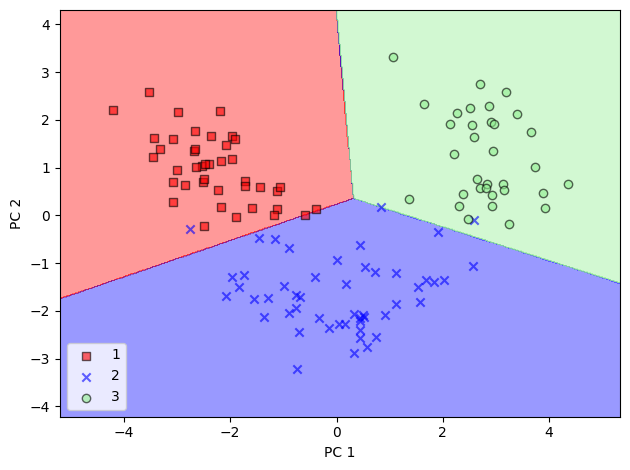

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA


#initialize PCA transformer and logistic regession estimator

pca=PCA(n_components=2)
lr=LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')

#dimentionality reduction:
X_train_pca=pca.fit_transform(X_train_std)
X_test_pca=pca.transform(X_test_std)

#fitting the lr model on the reduced dataset

lr.fit(X_train_pca, y_train)
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [17]:
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108,
       0.05051724, 0.03954654, 0.02643918, 0.02389319, 0.01629614,
       0.01380021, 0.01172226, 0.00820609])

In [18]:
X_train_pca

array([[ 2.38299011,  0.45458499, -0.22703207, ...,  0.29726982,
         0.23489704, -0.40161994],
       [-1.96578183,  1.65376939,  1.38709268, ..., -0.14334855,
        -0.27213429, -0.0148829 ],
       [-2.53907598,  1.02909066,  1.32551841, ..., -0.15739501,
         0.64563779,  0.13835572],
       ...,
       [ 4.35308397,  0.66536041, -1.31737358, ..., -0.09152939,
         0.37706503,  0.38561142],
       [-1.84315373, -1.50688415,  0.24631395, ..., -0.17323527,
         0.86394227, -1.00559686],
       [-0.40860955, -1.29720607,  1.40315602, ...,  0.46153523,
         0.1071608 , -0.09379872]])

# Supervised data compression via linear discriminant analysis